In [1]:
!pip3 install qiskit

     |████████████████████████████████| 6.7MB 2.8MB/s 
     |████████████████████████████████| 23.3MB 95kB/s 
     |████████████████████████████████| 163kB 46.2MB/s 
     |████████████████████████████████| 184kB 49.1MB/s 
     |████████████████████████████████| 1.9MB 35.0MB/s 
     |████████████████████████████████| 962kB 39.3MB/s 
     |████████████████████████████████| 5.8MB 43.3MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 296kB 39.3MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 583kB 30.4MB/s 
     |████████████████████████████████| 26.0MB 1.4MB/s 
     |████████████████████████████████| 2.7MB 37.2MB/s 
  Created wheel for qiskit: filename=qiskit-0.19.6-cp36-none-any.whl size=3019 sha256=c613037751a5eb7be42c639f8fae2bb459453b7e937b18cf39ab9aa729e58f8a
  Stored in directory: /root/.cache/pip/wheels/35/45/55/8b82d355edf738ebd

In [2]:
import qiskit as q

In [3]:
print ("check version: ", q.__qiskit_version__)

check version:  {'qiskit-terra': '0.14.2', 'qiskit-aer': '0.5.2', 'qiskit-ignis': '0.3.3', 'qiskit-ibmq-provider': '0.7.2', 'qiskit-aqua': '0.7.3', 'qiskit': None}


In [4]:
from qiskit import IBMQ
import matplotlib.pyplot as plt

In [ ]:

IBMQ.save_account('find your own number')

In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### _Some Simple Gates_ 

Before discussing gates, few points about qubits.. 

A qubit takes two complex numbers to fully describe it. A qubit is a quantum system consisting of 2 levels-- $|0\rangle , \, |1\rangle$. These two levels can also be represented in matrix (vector) form as-- 
$$\begin{pmatrix} 1\\0 \end{pmatrix}=|0\rangle,\, \begin{pmatrix} 0\\1 \end{pmatrix}=|1\rangle$$. 

Most importantly unlike classical bit, qubit doesn't always have to be in either of $|0\rangle$ or $|1\rangle$ state. It can be in arbitrary quantum state  denoted by $|\psi\rangle$ with superposition of the basis vector $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$. 

Since the state vectors are normalized (recall the statistical interpretation of a state vector aka wave function) i.e. $\int \limits _{-\infty}^{+\infty} \left|\psi (x, t)\right|^2\, dx =1$, suggests a qubit in some state $|\psi\rangle$, when it is measured in the standard basis, the results $0$ and $1$ are obtained with respective probabilities $\left|\alpha \right| ^2$ and $\left|\beta \right|^2$ and, together the satisfy $\left|\alpha \right| ^2 + \left|\beta \right| ^2 = 1$.    

One more important property to remember about quantum gates is that all quantum gates can be represented by matrices and these matrices will be [unitary](https://mathworld.wolfram.com/UnitaryMatrix.html). Two important properties of unitary matrix $U$ are -- $\left|\text{det}\, U\right| = 1$ i.e. it preserves norm and thus probability amplitude and if we have a unitary operation $U$ (read as a quantum gate) then $U^{-1}$ exists. This can be stated as quantum gates are reversible because in principle the inverse of unitary matrix always exists.  Now, time to learn about some simple q-gates-- 


#### _X-Gate:_ 

For Qiskit documentation check [here](https://qiskit.org/documentation/stubs/qiskit.circuit.library.XGate.html#qiskit.circuit.library.XGate). 

Single qubit Pauli X-gate $(\sigma _x)$. Recall the Pauli $\sigma _x$ matrix is given by $$\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix},$$ which is exactly the matrix representation of X-gate. it flips bit $|0\rangle \rightarrow |1\rangle$ and vice-versa. 

Here it is necessary to learn how to write a single qubit operator in matrix form. A single qubit gate operator (matrix) will have dimension $2^1 \times 2^1$. Soon we will deal with 2 qubit gates. For single qubit,  if $\hat{A}$ is an operator and we know the action on the basis set $\{  | {u_i} \rangle \}$,   then $A_{ij} = \langle u_i | \hat{A} | u_j\rangle$  is a number that represents the matrix element at the ith row and jth column. So  --

$$\begin{pmatrix} \langle u_1|\hat{A}|u_1 \rangle & \langle u_1|\hat{A}|u_2 \rangle \\ \langle u_2|\hat{A}|u_1 \rangle & \langle u_2|\hat{A}|u_2 \rangle \end{pmatrix}$$

Now, it is easy to understand the matrix form of X-gate. For the other pauli matrices, which are Y and Z gates, we can construct the matrices in similar manner. Here's summary of the operation of Y and Z on single qubits.. 

$Z|0\rangle = |0\rangle, Z|1\rangle = -|1\rangle \, $;
$Y|0\rangle = i|1\rangle, Y|1\rangle = -i|0\rangle$

So the Pauli matrices can be written as --

$$X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end {pmatrix},\,  Y = \begin{pmatrix} 0 & -i \\ i & 0 \end {pmatrix},\,  Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end {pmatrix}. $$
____________________________________________________________

#### _CX-Gate:_

Controlled not-gate. For Qiskit documentation check [here](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.html#qiskit.circuit.library.CXGate).  

This gate is similar to classical XOR gate, so it flips the target qubit iff the control qubit is in state $|1\rangle$. The control qubit however remains unchanged. Only when the allowed values of qubits are $|0\rangle \, \text{and}\,  |1\rangle$, then this can be thought of as classical XOR gate. Fun of qubits are that they in general can be in the linear superposition of $|0\rangle \, \text{and}\,  |1\rangle$ thus, the CX gate transforms :

$a|00\rangle + b|01\rangle + c|10\rangle + d|11\rangle$ to 

$a|00\rangle + b|01\rangle + c|11\rangle + d|10\rangle$. 

The transformation matrix is the permutation matrix: 

$$\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix}.$$

Since CX is a two qubit gate, to construct the matrix, we need to consider the action on the 2 qubit states. The 2 qubit states can be thought of as [tensor product](https://en.wikipedia.org/wiki/Tensor_product) and are of the form $|a\rangle \otimes |b\rangle$ or $|ab\rangle$. If we know the action of an operator on the states $|ab\rangle$, then the operator can be written in matrix form as -- 

$$\begin{pmatrix} \langle 00 | \hat{A} | 00 \rangle & \langle 00 | \hat{A} | 01 \rangle & \langle 00 | \hat{A} | 10 \rangle & \langle 00 | \hat{A} | 11 \rangle \\ \langle 01 | \hat{A} | 00 \rangle & \langle 01 | \hat{A} | 01 \rangle & \langle 01 | \hat{A} | 10 \rangle & \langle 01 | \hat{A} | 11 \rangle \\ \langle 10 | \hat{A} | 00 \rangle & \langle 10 | \hat{A} | 01 \rangle & \langle 10 | \hat{A} | 10 \rangle & \langle 10 | \hat{A} | 11 \rangle \\ \langle 11 | \hat{A} | 00 \rangle & \langle 11 | \hat{A} | 01 \rangle & \langle 11 | \hat{A} | 10 \rangle & \langle 11 | \hat{A} | 11 \rangle\end{pmatrix}.$$

Here is one more thing to note, which is useful in computing inner products. Consider, $|\phi _1 \rangle  = |\gamma _1\rangle \otimes |\chi _1\rangle$ and $|\phi _2 \rangle  = |\gamma _2\rangle \otimes |\chi _2\rangle$, then the inner product can be written as -- 
$\langle \phi _1 | \phi _2 \rangle = \left( |\gamma _1\rangle \otimes |\chi _1\rangle \right) \, \left( |\gamma _2\rangle \otimes |\chi _2\rangle \right) =  \langle \gamma _1 | \gamma _2 \rangle \, \langle \chi _1 | \chi _2 \rangle$. 

The outer product notation of CX gate can be written as -- 
$CX = |00\rangle \langle 00| + |01\rangle \langle 01| + |10\rangle \langle 11| + |11\rangle \langle 10|$.   


With these things in mind, we can now create simple quantum circuits. 

In [ ]:
circuit = q.QuantumCircuit(2, 2) # creates a new circuit with 2 classical and 2 quantum bits
# apply a simple not gate 
circuit.x(1) # as both the bits are at 0, 0 this will flip the second bit to 1. # the number generally always represents the index, i.e. 1-- second index
circuit.draw() 

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
c_0: ═════
          
c_1: ═════

In [ ]:
# after flipping the second bit to 1 now we apply the controlled not gate
circuit.cx(1, 0) # conrolled qubit is the 2nd one and the target qubit is the 1st one 
# QuantumCircuit.cx(control_qubit, target_qubit, *, label=None, ctrl_state=None, ctl=None, tgt=None)
# here's the description [https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.cx.html]. 

# since the controlled bit is 1 so it will flip the target qubit which was initially sitting at 0,  to 1.  
# rather than values think of this 0, 1 inside circuit.cx() as indices of the qubits.  
# so at this stage we will have 1, 1 as output. 
circuit.draw() 

┌───┐
q_0: ─────┤ X ├
     ┌───┐└─┬─┘
q_1: ┤ X ├──■──
     └───┘     
c_0: ══════════
               
c_1: ══════════

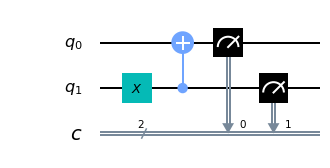

In [ ]:
circuit.measure([0, 1], [0, 1]) # measure: quantum bit into classical bit, 
# again think of the 0, 1 as indices, first list is the quantum register consisting of 2 qubits
# second list is the classical register consisting of 2 classical bits. 
# think of this as value for qubit 0 is what will be returned for classical bit 0 and so on. 
circuit.draw(output='mpl')   

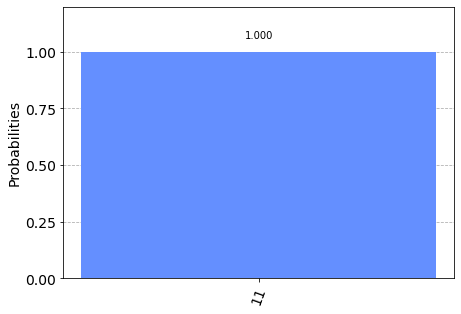

In [ ]:
# let's simulate this before sending it to a quantum computer
# idea is we simulate the quantum computer computation in local computer using Aer framework

simulator = q.Aer.get_backend('qasm_simulator') # qasm : quantum assembly lang.
results = q.execute(circuit, backend=simulator).result() # execute the circuit based on the simulator as backend
q.visualization.plot_histogram(results.get_counts(circuit))

As expected we get [1, 1] as output with 100% probability. 
Let's now proceed to do this on a quantum computer. 

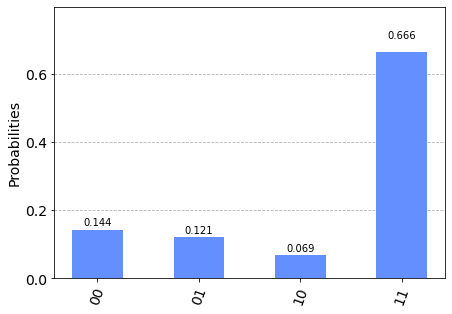

In [ ]:
# Now we will use IBM Quantum Computer to see the result 
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_burlington') # check which computer has 0 jobs on queue
job = q.execute(circuit, backend=qcomp)
q_result = job.result()

q.visualization.plot_histogram(q_result.get_counts(circuit))

Here the result is unexpected and different from thr classical case. Compared to the simulated case the real device is still susceptible to quantum noise and thus we can see components other than $|11\rangle$ are present too. The above result is actually pretty noisy! 

------------------------
#### Repeat the Task but now Apply X gate on First bit and CX gate with First Qubit as Control bit 
--------------------